<a href="https://colab.research.google.com/github/zacichan/emap/blob/main/ECOM182_Topic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECOM182 - Microeconomics for Policy
## Topic 1: Utility maximisation, efficiency, equity



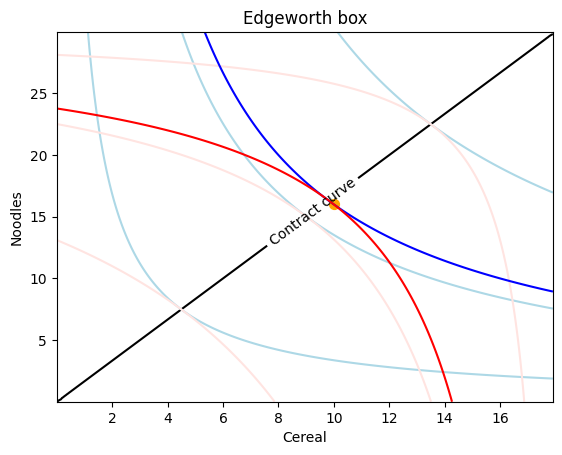

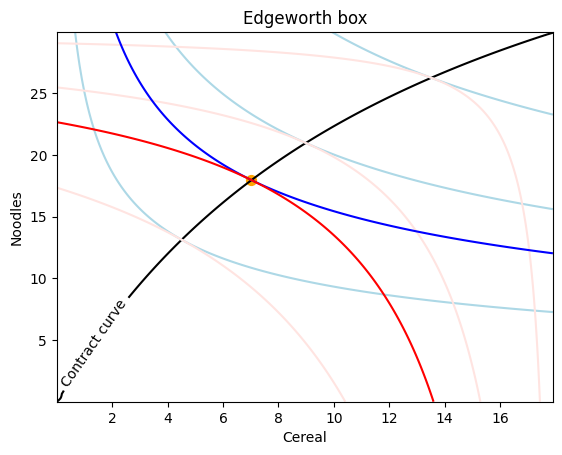

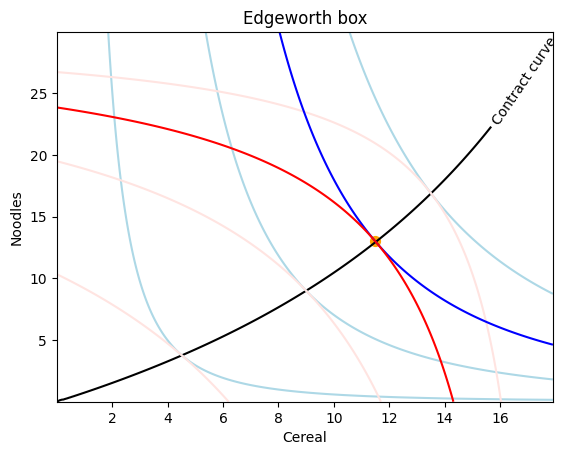

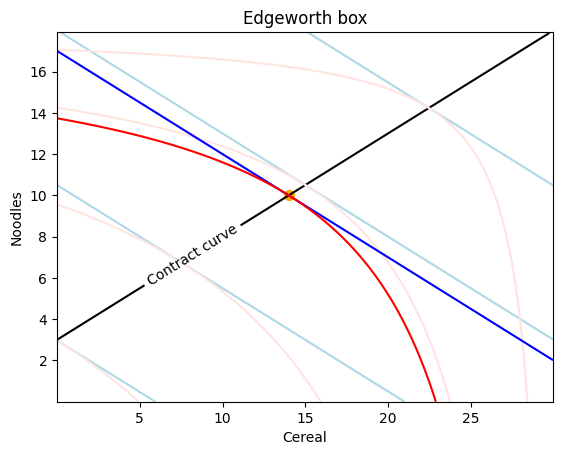

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the main function to draw the Edgeworth box
def draw_Ed_Bow(U1, U2, Xmax, Ymax, Xmin=10**(-6), Ymin=10**(-6), Utility_Show=False,
                Num_ind=10, Xlab="X", Ylab="Y", e=200, Contract_draw=True, AlPoint=None,
                colors=["black", "Orange", "blue", "red"], Utility_draw=True):

    """
    Draw an Edgeworth Box to illustrate the concept of Pareto Efficiency and Indifference Curves.

    Parameters:
    - U1: Utility function for individual 1 (a function that takes x and y as arguments).
    - U2: Utility function for individual 2 (a function that takes x and y as arguments).
    - Xmax: Maximum value for X-axis.
    - Ymax: Maximum value for Y-axis.
    - Xmin: Minimum value for X-axis (default is a very small positive value).
    - Ymin: Minimum value for Y-axis (default is a very small positive value).
    - Utility_Show: If True, display utility values on the indifference curves (default is False).
    - Num_ind: Number of indifference curves to plot (default is 10).
    - Xlab: Label for the X-axis (default is "X").
    - Ylab: Label for the Y-axis (default is "Y").
    - e: Granularity of grid for drawing the Edgeworth Box (default is 200).
    - Contract_draw: If True, draw the contract curve (default is True).
    - AlPoint: Allocation point as a tuple (X, Y) to be marked on the Edgeworth Box (default is None).
    - colors: List of colors for various elements (default is ["black", "Orange", "blue", "red"]).
    - Utility_draw: If True, draw the indifference curves (default is True).

    Returns:
    - None

    This function draws an Edgeworth Box, including the contract curve, allocation point (if provided),
    and indifference curves for two individuals with utility functions U1 and U2.
    """


    delta = min((Xmax - Xmin) / e, (Ymax - Ymin) / e)
    x = np.arange(Xmin, Xmax, delta)
    y = np.arange(Ymin, Ymax, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = lambda x, y: U1(x, y)
    Z2 = lambda x, y: U2(Xmax - x, Ymax - y)

    # Draw the contract curve
    Num_ind_1 = Num_ind
    Num_ind_2 = Num_ind

    if Contract_draw:
        Z2grad = np.gradient(Z2(X, Y))
        Z1grad = np.gradient(Z1(X, Y))
        out = (Z2grad[0] * Z1grad[1] - Z2grad[1] * Z1grad[0])
        Cont = plt.contour(X, Y, out, colors=colors[0], levels=[0])
        plt.clabel(Cont, Cont.levels, inline=True, fmt="Contract curve", fontsize=10)

        C_curv = abs(pd.DataFrame(out, index=y, columns=x))
        C_curv = C_curv.index @ (C_curv == C_curv.apply(min))
        xC_curv = np.arange(Xmin, Xmax, (Xmax - Xmin) / (Num_ind + 1))
        C_curv = np.interp(xC_curv, C_curv.index, C_curv)
        Num_ind_1 = pd.Series(Z1(xC_curv, C_curv)).sort_values(ascending=True)
        Num_ind_2 = pd.Series(Z2(xC_curv, C_curv)).sort_values(ascending=True)

    # Draw the allocation point and indifference curves
    if AlPoint is not None:
        plt.scatter(AlPoint[0], AlPoint[1], s=200, marker=".", color=colors[1], label="Allocation point")
        Num_ind_1 = [Z1(AlPoint[0], AlPoint[1])]
        Num_ind_2 = [Z2(AlPoint[0], AlPoint[1])]

    # Draw the indifference curves
    if Utility_draw:
        C1 = plt.contour(X, Y, Z1(X, Y), colors=colors[2], levels=Num_ind_1)
        C2 = plt.contour(X, Y, Z2(X, Y), colors=colors[3], levels=Num_ind_2)
        if Utility_Show:
            fmt = {}
            strs = round(pd.Series(C1.levels[:]), 1)
            for l, s in zip(C1.levels, strs):
                fmt[l] = s
            plt.clabel(C1, C1.levels, inline=True, fmt=fmt, fontsize=10)

            fmt = {}
            strs = round(pd.Series(C2.levels[:]), 1)
            for l, s in zip(C2.levels, strs):
                fmt[l] = s
            plt.clabel(C2, C2.levels, inline=True, fmt=fmt, fontsize=10)

    plt.title("Edgeworth box")
    plt.xlabel(Xlab)
    plt.ylabel(Ylab)

# Utility functions for agents
U1 = lambda c, n: c**0.5 * n**0.5
U2 = lambda c, n: c**0.5 * n**0.5

# Example 1
draw_Ed_Bow(U1, U2, 18, 30, colors=["black", "Orange", "lightblue", "mistyrose"], Num_ind=3)
draw_Ed_Bow(U1, U2, 18, 30, Xlab="Cereal", Ylab="Noodles", AlPoint=(10, 16), Contract_draw=False)
plt.show()

# Example 2
U1 = lambda c, n: c**0.3 * n**0.7
U2 = lambda c, n: c**0.5 * n**0.5

draw_Ed_Bow(U1, U2, 18, 30, colors=["black", "Orange", "lightblue", "mistyrose"], Num_ind=3)
draw_Ed_Bow(U1, U2, 18, 30, Xlab="Cereal", Ylab="Noodles", AlPoint=(7, 18), Contract_draw=False)
plt.show()

# Example 3
U1 = lambda c, n: c**0.7 * n**0.3
U2 = lambda c, n: c**0.5 * n**0.5

draw_Ed_Bow(U1, U2, 18, 30, colors=["black", "Orange", "lightblue", "mistyrose"], Num_ind=3)
draw_Ed_Bow(U1, U2, 18, 30, Xlab="Cereal", Ylab="Noodles", AlPoint=(11.5, 13), Contract_draw=False)
plt.show()

# Example 4
U1 = lambda n, c: n + 2 * (c)
U2 = lambda c, n: n**0.5 * c**0.5

draw_Ed_Bow(U1, U2, 30, 18, colors=["black", "Orange", "lightblue", "mistyrose"], Num_ind=3)
draw_Ed_Bow(U1, U2, 30, 18, Xlab="Cereal", Ylab="Noodles", AlPoint=(14, 10), Contract_draw=False)
plt.show()


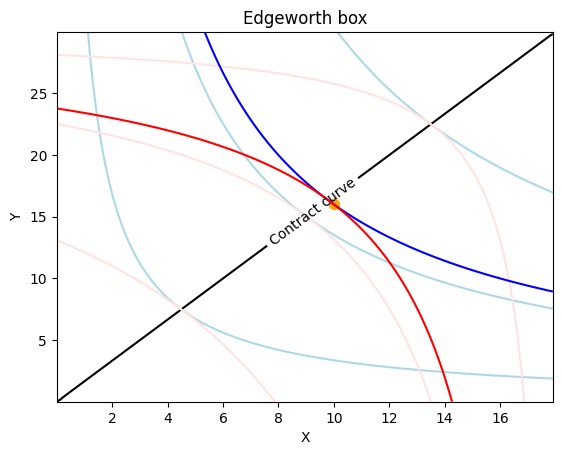

In [13]:
# Endowments for Person 1 and Person 2
X1_endowment = 30
Y1_endowment = 120
X2_endowment = 180
Y2_endowment = 90

# Create the Edgeworth box
#draw_Ed_Bow(U1, U2, Xmax=200, Ymax=200, Xlab="Good X", Ylab="Good Y", AlPoint=(X1_endowment, Y1_endowment), Contract_draw=False)

# Show the Edgeworth box
plt.show()

# Example 1

# Utility functions for agents
U1 = lambda c, n: c**0.5 * n**0.5
U2 = lambda c, n: c**0.5 * n**0.5

draw_Ed_Bow(U1, U2, 18, 30, colors=["black", "Orange", "lightblue", "mistyrose"], Num_ind=3)
draw_Ed_Bow(U1, U2, 18, 30, Xlab="X", Ylab="Y", AlPoint=(10, 16), Contract_draw=False)
plt.show()

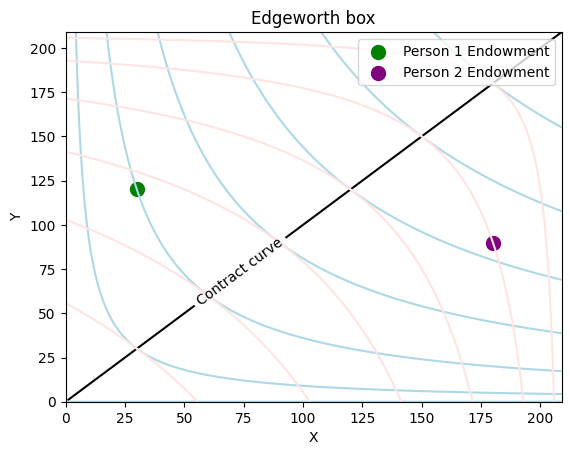

In [21]:
# Define the utility functions for Person 1 and Person 2
def U1(x, y):
    return x * y

def U2(x, y):
    return x * y

# Person 1's endowment
X1_endowment = 30
Y1_endowment = 120

# Person 2's endowment
X2_endowment = 180
Y2_endowment = 90

# Call the draw_Ed_Bow function to draw the Edgeworth box
draw_Ed_Bow(
    U1=U1,
    U2=U2,
    Xmax=X1_endowment + X2_endowment,
    Ymax=Y1_endowment + Y2_endowment,
    Xmin=0,
    Ymin=0,
    Utility_Show=False,
    Num_ind=6,
    Xlab="X",
    Ylab="Y",
    Contract_draw=True,
    AlPoint=None,
    colors=["black", "Orange", "lightblue", "mistyrose"],
    Utility_draw=True
)

# Plot Person 1's endowment point
plt.scatter(X1_endowment, Y1_endowment, s=100, marker="o", color="green", label="Person 1 Endowment")

# Plot Person 2's endowment point
plt.scatter(X2_endowment, Y2_endowment, s=100, marker="o", color="purple", label="Person 2 Endowment")

# Add labels and legend
plt.legend(loc="upper right")
plt.show()


### Question 1:

*In a two-person, two-good pure exchange economy, Adam has an initial endowment of 15 flawless 1-carat diamonds ($D_A=15$) and 5 gallons of drinking water ($W_A=5$). Beth has no diamonds ($D_B=0$) but 20 gallons of drinking water ($W_B=20$).*



* *(a) In explaining his preferences, Adam says that he prefers $(D_A=5, W_A=10)$ to his initial endowment. He also says that he is indifferent to $(D_A=5, W_A=10)$ and $(D_A=12, W_A=5)$. Are these preferences consistent or inconsistent with the standard assumptions of the utility-maximization model?*



* *(b) What are the dimensions of the Edgeworth box that represents the possible allocations in this economy? Draw it.*




*   *(c) Show the point on the Edgeworth box that represents the initial endowments. Is it possible for these initial endowments to be an efficient allocation?*






1) a)

If Adam is in consistent between the utility of the bundle $(D_A=5, W_A=10)$ and $(D_A=12, W_A=5)$, this implies that

### Question 2:

*Consider an economy of two people who consume just two goods X and Y. Person 1 has an endowment of $X_1=30$ and $Y_1=120$. Person 2 has an endowment of $X_2=180$ and $Y_2=90$. Their utility functions are, respectively, $U_1=X_1Y_1$ and $U_2=X_2Y_2$.*

* *(a) Graph the Edgeworth box corresponding to this economy.*



* *(b) What are the equations for the indifference curves of persons 1 and 2 that go through the initial endowments? Plot the curves.*



* *(c) Shade in the locus of points that are Pareto-superior to the initial endowments.*



* *(d) What is the equation of the contract curve in this economy? Graph it.*



* *(e) Identify the boundaries of points on the contract curve that are Pareto-superior to the initial endowments.*



* *(f) Suppose a secretary of the market announces that all trading must take place at $P_X=£1$ and $P_Y=£2$. Furthermore, the secretary takes away each person's initial endowment and replaces it with its cash value. The secretary instructs each person to order the quantities of X and Y that maximize utility subject to the budget constraint:*

    * *(1) What quantities will persons 1 and 2 order? Can the secretary fill these orders with the endowments collected? (Answer: No).*

    * *(2) Go through the same exercise with $P_X=£2$ and explain why the outcome is feasible and efficient.*
